<a href="https://colab.research.google.com/github/ngupta23/ds7337_nlp/blob/master/code/week4_rnn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import imdb

In [2]:
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17465344/17464789 [==============================] - 2s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [3]:
print('---review---')
print(len(X_train[5]))
print(X_train[5])
print('---label---')
print(y_train[5])

---review---
43
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
---label---
0


In [4]:
y_train[1]

0

In [5]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('---review with words---')
print(decode_review(X_train[5]))
print('---label---')
print(y_train[5])

1646592/1641221 [==============================] - 0s 0us/step
---review with words---
<START> begins better than it ends funny that the russian <UNK> crew <UNK> all other actors it's like those scenes where documentary shots br br spoiler part the message <UNK> was contrary to the whole story it just does not <UNK> br br
---label---
0


In [6]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [7]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [0]:
l=[len(i) for i in X_train]

(array([8.500e+01, 9.070e+02, 1.151e+03, 1.347e+03, 3.731e+03, 3.347e+03,
        2.510e+03, 1.865e+03, 1.426e+03, 1.229e+03, 9.660e+02, 7.700e+02,
        7.270e+02, 6.090e+02, 5.670e+02, 4.210e+02, 3.920e+02, 3.340e+02,
        3.050e+02, 2.780e+02, 2.280e+02, 2.000e+02, 1.670e+02, 1.700e+02,
        1.460e+02, 1.230e+02, 1.050e+02, 1.030e+02, 9.200e+01, 7.300e+01,
        6.800e+01, 7.300e+01, 6.500e+01, 5.200e+01, 4.900e+01, 3.100e+01,
        4.400e+01, 3.200e+01, 4.500e+01, 5.800e+01, 6.500e+01, 1.500e+01,
        2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

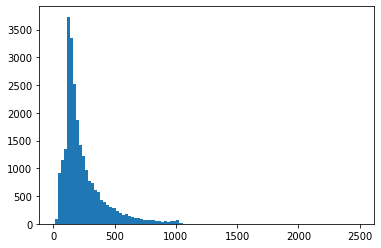

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(l,bins=100)


In [10]:
import numpy as np
np.quantile(l,0.92)

512.0

In [0]:
from tensorflow.keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [12]:
import numpy as np
X_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense

In [14]:
from tensorflow.keras.layers import SimpleRNN as RNN
embedding_vecor_length = 80
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_vecor_length, input_length=max_words))
model1.add(RNN(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 80)           400000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               18100     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 418,201
Trainable params: 418,201
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)


Epoch 1/10
98/98 [==============================] - 34s 347ms/step - loss: 0.6723 - accuracy: 0.5734 - val_loss: 0.5591 - val_accuracy: 0.7376
Epoch 2/10
98/98 [==============================] - 35s 355ms/step - loss: 0.4023 - accuracy: 0.8206 - val_loss: 0.4112 - val_accuracy: 0.8163
Epoch 3/10
98/98 [==============================] - 34s 343ms/step - loss: 0.2692 - accuracy: 0.8912 - val_loss: 0.3659 - val_accuracy: 0.8533
Epoch 4/10
98/98 [==============================] - 35s 356ms/step - loss: 0.1930 - accuracy: 0.9254 - val_loss: 0.6603 - val_accuracy: 0.6717
Epoch 5/10
98/98 [==============================] - 34s 350ms/step - loss: 0.1638 - accuracy: 0.9383 - val_loss: 0.4939 - val_accuracy: 0.8281
Epoch 6/10
98/98 [==============================] - 34s 351ms/step - loss: 0.0544 - accuracy: 0.9847 - val_loss: 0.5759 - val_accuracy: 0.8140
Epoch 7/10
98/98 [==============================] - 34s 352ms/step - loss: 0.0169 - accuracy: 0.9973 - val_loss: 0.6838 - val_accuracy: 0.8113

In [16]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.791920006275177


In [17]:
history.history

{'accuracy': [0.5734000205993652,
  0.8205999732017517,
  0.8912400007247925,
  0.9253600239753723,
  0.9382799863815308,
  0.98471999168396,
  0.9973199963569641,
  0.998520016670227,
  0.9994000196456909,
  0.9991599917411804],
 'loss': [0.6722838282585144,
  0.4022899568080902,
  0.26918843388557434,
  0.19302205741405487,
  0.16384616494178772,
  0.05435989424586296,
  0.016929522156715393,
  0.010360508225858212,
  0.004990953486412764,
  0.005540621466934681],
 'val_accuracy': [0.737559974193573,
  0.81632000207901,
  0.8532800078392029,
  0.671720027923584,
  0.8281199932098389,
  0.8140000104904175,
  0.8113200068473816,
  0.8067600131034851,
  0.8226400017738342,
  0.791920006275177],
 'val_loss': [0.5590773224830627,
  0.41116389632225037,
  0.3658575415611267,
  0.6602961421012878,
  0.49388036131858826,
  0.5759081840515137,
  0.6838309168815613,
  0.7156343460083008,
  0.7379415035247803,
  0.8299343585968018]}

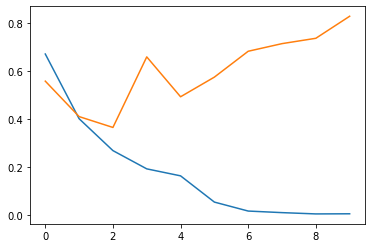

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()